In [42]:
import pandas as pd
import skmob
from skmob.measures.individual import radius_of_gyration
from skmob.measures.individual import maximum_distance
from skmob.measures.individual import number_of_locations
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/dados_18.11/df_main_full_jf.csv', sep=';')
df.rename(columns={'residence_antenna': 'ANTENNA_ID'}, inplace=True)
df['full_date']= df['date'] + 'T' + df['time'] + 'Z'

In [7]:
df.rename(columns={'residence_antenna': 'ANTENNA_ID'}, inplace=True)
df.sample(5)

,date,time,user_from,ANTENNA_ID,classe,full_date
1252548,2013-03-24,13:47:54,634A5F1D6BE788858A39D7B7CCF0C8D5,50472,2,2013-03-24T13:47:54Z
7329633,2013-04-11,04:44:32,8DD442B4D15823868AB75AD40C9DE88C,23592,2,2013-04-11T04:44:32Z
2477136,2013-03-28,15:31:42,15E6059585F197046A0CFBD8D8E28AF0,51582,4,2013-03-28T15:31:42Z
8198655,2013-04-13,22:53:37,1643B6ECED8306BD53CDEC2DE7E032C8,23713,5,2013-04-13T22:53:37Z
9134493,2013-04-16,18:06:40,7EA76BE0C0E9B6661DED63A9DBE951D3,51594,5,2013-04-16T18:06:40Z


In [22]:
df_antennas = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/antenas/antennas_municipality.txt', sep=';')
df_antennas.rename(columns={'CELLID': 'ANTENNA_ID'}, inplace=True)
df_antennas.head()

,ANTENNA_ID,UF,DDD,LAT,LONG,CITY,MUNICIPALITY
0,27823,RJ,21,-22.82638,-43.32344,Rio de Janeiro,Região Geográfica Imediata do Rio de Janeiro
1,27852,RJ,21,-22.82638,-43.32344,Rio de Janeiro,Região Geográfica Imediata do Rio de Janeiro
2,60097,AC,68,-7.63047,-72.66910,Cruzeiro do Sul,Microrregião de Cruzeiro do Sul
3,20109,AC,68,-9.97669,-67.86836,Rio Branco,Região Geográfica Imediata de Rio Branco
4,20237,AC,68,-9.97197,-67.81339,Rio Branco,Região Geográfica Imediata de Rio Branco


In [24]:
df_antennas = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/antenas/antennas_municipality.txt', sep=';')
df_antennas.rename(columns={'CELLID': 'ANTENNA_ID'}, inplace=True)
df_antennas = df_antennas.groupby('ANTENNA_ID').first().reset_index()
df = pd.merge(df, df_antennas[['ANTENNA_ID', 'LONG', 'LAT']], on='ANTENNA_ID')
df.head()

,date,time,user_from,ANTENNA_ID,classe,full_date,LONG,LAT
0,2013-03-21,14:55:45,CDCBFDB2562F499011E45431A7ABEFF3,50721,3,2013-03-21T14:55:45Z,-43.55546,-21.46057
1,2013-03-21,13:07:02,A6A316DBD51C17276637E402D8C04330,50721,3,2013-03-21T13:07:02Z,-43.55546,-21.46057
2,2013-03-21,20:15:51,EA88D04C4955D4480BBBAA4A3C0D18CB,50721,3,2013-03-21T20:15:51Z,-43.55546,-21.46057
3,2013-03-21,20:43:42,A5352930749AF2DEE3266E4F1A042A80,50721,3,2013-03-21T20:43:42Z,-43.55546,-21.46057
4,2013-03-21,20:23:55,56C0B1CBD8DF6A264E9F2592209A0C4A,50721,3,2013-03-21T20:23:55Z,-43.55546,-21.46057


In [26]:
tdf = skmob.TrajDataFrame(df, latitude='LAT', longitude='LONG', datetime='full_date', user_id='user_from')
rg_df = round(radius_of_gyration(tdf),7)
rg_df.rename(columns={'uid': 'user_from'}, inplace=True)
rg_df.head()

100%|██████████| 574742/574742 [16:06<00:00, 594.93it/s]


,user_from,radius_of_gyration
0,000008B27F635FC0AFF9BAC21880B796,0.000000
1,0000093420C28302BEF6A7F00486EE1F,0.000000
2,00000EDECB2AD3CC8C49739919C4E80B,0.000000
3,00003F26576D1122848B6F3CEEC250E5,1.588187
4,00004388E7C0B5C3DB7136728132FDCF,3.711497


In [27]:
df_grouped = df.groupby('user_from').first().reset_index()
rg_df.rename(columns={'uid': 'user_from'}, inplace=True)
rg_df_with_class = pd.merge(rg_df, df_grouped[['user_from', 'classe']], on='user_from')
rg_df_with_class

,user_from,radius_of_gyration,classe
0,000008B27F635FC0AFF9BAC21880B796,0.000000,4
1,0000093420C28302BEF6A7F00486EE1F,0.000000,2
2,00000EDECB2AD3CC8C49739919C4E80B,0.000000,5
3,00003F26576D1122848B6F3CEEC250E5,1.588187,5
4,00004388E7C0B5C3DB7136728132FDCF,3.711497,4
5,000043A7E0384FDF8FAF674515162EDB,0.000000,2
6,00008F35ECDA3AF85A28773C8952E5EF,17.461138,3
7,0000A933443B1C18B850FA495E3E3A68,0.000000,4
8,0000ACD53DCCDCDEC91E8DB068CF281E,0.000000,4
9,0000B61C3BE15D2D3E8F2A32C67353E8,0.000000,2


In [33]:
df['classe'].unique()

array([3, 4, 5, 2])

In [28]:
rg_df_grouped_class = rg_df_with_class.groupby('classe')['radius_of_gyration'].mean().reset_index()
rg_df_grouped_class.loc[len(rg_df_grouped_class)] = ['All', rg_df_grouped_class['radius_of_gyration'].mean()]
rg_df_grouped_class

,classe,radius_of_gyration
0,2,6.274755
1,3,10.673320
2,4,4.965185
3,5,12.710248
4,All,8.655877


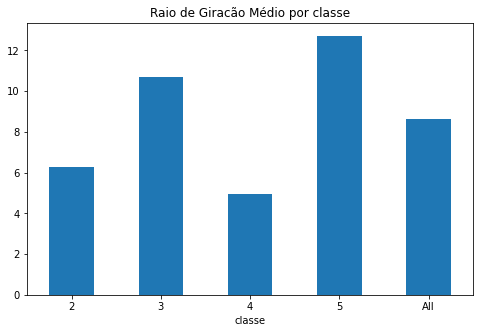

In [49]:
rg_df_grouped_class.plot.bar(x='classe', 
                             y='radius_of_gyration',
                             title='Raio de Giracão Médio por classe', 
                             rot=360,  
                             legend=False,
                             figsize=(8,5))

plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/metricas_scikit-mobility/raio_giracao_jf.png')
plt.show()

In [36]:
md_df = round(maximum_distance(tdf), 7)
md_df.rename(columns={'uid': 'user_from'}, inplace=True)
md_df.head()

,user_from,maximum_distance
0,000008B27F635FC0AFF9BAC21880B796,NaN
1,0000093420C28302BEF6A7F00486EE1F,0.000000
2,00000EDECB2AD3CC8C49739919C4E80B,NaN
3,00003F26576D1122848B6F3CEEC250E5,4.213541
4,00004388E7C0B5C3DB7136728132FDCF,8.215749


In [37]:
md_df_with_class = pd.merge(md_df, df_grouped[['user_from', 'classe']], on='user_from')
md_df_with_class

,user_from,maximum_distance,classe
0,000008B27F635FC0AFF9BAC21880B796,NaN,4
1,0000093420C28302BEF6A7F00486EE1F,0.000000,2
2,00000EDECB2AD3CC8C49739919C4E80B,NaN,5
3,00003F26576D1122848B6F3CEEC250E5,4.213541,5
4,00004388E7C0B5C3DB7136728132FDCF,8.215749,4
5,000043A7E0384FDF8FAF674515162EDB,NaN,2
6,00008F35ECDA3AF85A28773C8952E5EF,43.445754,3
7,0000A933443B1C18B850FA495E3E3A68,0.000000,4
8,0000ACD53DCCDCDEC91E8DB068CF281E,0.000000,4
9,0000B61C3BE15D2D3E8F2A32C67353E8,0.000000,2


In [38]:
md_df_grouped_class = md_df_with_class.groupby('classe')['maximum_distance'].mean().reset_index()
md_df_grouped_class.loc[len(md_df_grouped_class)] = ['All', md_df_grouped_class['maximum_distance'].mean()]
md_df_grouped_class

,classe,maximum_distance
0,2,24.855344
1,3,53.853007
2,4,20.773290
3,5,47.704826
4,All,36.796617


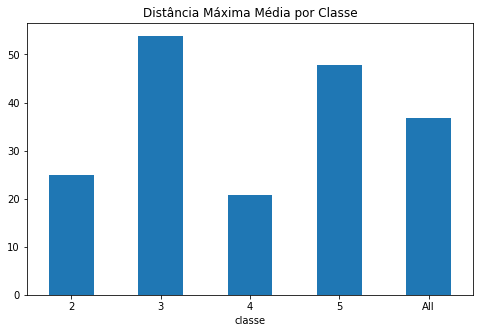

In [48]:
md_df_grouped_class.plot.bar(x='classe', 
                             y='maximum_distance',
                             title='Distância Máxima Média por Classe', 
                             rot=360,  
                             legend=False,
                             figsize=(8,5))

plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/metricas_scikit-mobility/distancia_maxima_jf.png')
plt.show()

In [43]:
nl_df = round(number_of_locations(tdf),7)
nl_df.rename(columns={'uid': 'user_from'}, inplace=True)
nl_df.head()

100%|██████████| 574742/574742 [25:18<00:00, 378.54it/s]


,user_from,number_of_locations
0,000008B27F635FC0AFF9BAC21880B796,1
1,0000093420C28302BEF6A7F00486EE1F,1
2,00000EDECB2AD3CC8C49739919C4E80B,1
3,00003F26576D1122848B6F3CEEC250E5,4
4,00004388E7C0B5C3DB7136728132FDCF,2


In [44]:
nl_df_with_class = pd.merge(nl_df, df_grouped[['user_from', 'classe']], on='user_from')
nl_df_with_class

,user_from,number_of_locations,classe
0,000008B27F635FC0AFF9BAC21880B796,1,4
1,0000093420C28302BEF6A7F00486EE1F,1,2
2,00000EDECB2AD3CC8C49739919C4E80B,1,5
3,00003F26576D1122848B6F3CEEC250E5,4,5
4,00004388E7C0B5C3DB7136728132FDCF,2,4
5,000043A7E0384FDF8FAF674515162EDB,1,2
6,00008F35ECDA3AF85A28773C8952E5EF,5,3
7,0000A933443B1C18B850FA495E3E3A68,1,4
8,0000ACD53DCCDCDEC91E8DB068CF281E,1,4
9,0000B61C3BE15D2D3E8F2A32C67353E8,1,2


In [45]:
nl_df_grouped_class = nl_df_with_class.groupby('classe')['number_of_locations'].mean().reset_index()
nl_df_grouped_class.loc[len(nl_df_grouped_class)] = ['All', nl_df_grouped_class['number_of_locations'].mean()]
nl_df_grouped_class

,classe,number_of_locations
0,2,1.646820
1,3,1.897884
2,4,1.806838
3,5,1.929958
4,All,1.820375


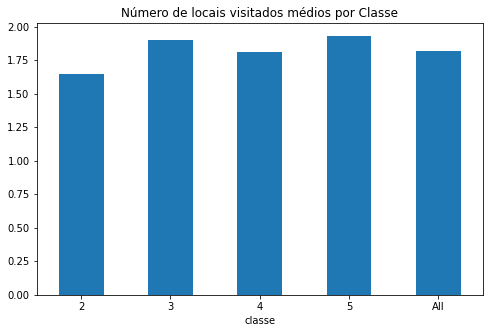

In [47]:
nl_df_grouped_class.plot.bar(x='classe', 
                             y='number_of_locations',
                             title='Número de locais visitados médios por Classe', 
                             rot=360,  
                             legend=False,
                             figsize=(8,5))

plt.savefig('/home/gustavo/Desktop/Mestrado/mestrado_dados/metricas_scikit-mobility/locais_visitados_jf.png')
plt.show()